# Data augmentation

As we have seen in the data_analysis notebook, the dataset is very imbalanced. In the classification notebook both undersampling and oversampling techniques were simple, non-complex, and yield no better results

Regarding NLP, a strategy to balance the dataset is to perform data augmentation through translations. In this notebook we will translate the tokens from the minority classes to a random language and then translate it back to portuguese, so sentences with the same meaning but writting in slittly diferent order are created

In [1]:
import pandas as pd
df = pd.read_excel('./data/OpArticles_ADUs.xlsx')

Split the data so we only perform data augmentation in the training set, avoid data leakage to the test set

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)


In [44]:
print(y_test)

2674     Value(-)
7609     Value(-)
10747    Value(-)
12931        Fact
4107     Value(+)
           ...   
8773        Value
13538    Value(-)
1782        Value
9772        Value
11212       Value
Name: label, Length: 3349, dtype: object


In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13394, 5) (13394,)
(3349, 5) (3349,)


In [3]:
X_train

,article_id,annotator,node,ranges,tokens
2754,5cf4789f896a7fea0600d732,B,16,"[[2244, 2333]]",A efetivação dos direitos requer mediações ent...
1046,5d04c332896a7fea06a0dfa5,C,1,"[[957, 1080]]","Adeptos, patrocinadores e operadores televisiv..."
10426,5cf46162896a7fea06ff8973,B,4,"[[944, 1008]]",pouco mais de um terço dos contratos anunciado...
4186,5cf4719e896a7fea060082ee,D,9,"[[2011, 2027]]",exige tratamento
4059,5cf47206896a7fea06008592,A,7,"[[1591, 1602]]",fiabilidade
...,...,...,...,...,...
9073,5cf462d0896a7fea06ff9424,D,17,"[[3462, 3582]]",houve já o cuidado de dilatar a sua entrada em...
11072,5cf46047896a7fea06ff6fe8,B,33,"[[3804, 3892]]","melhoraram, reforçaram os seus procedimentos d..."
15771,5ce393e4896a7fea066355bd,A,0,"[[189, 301]]",Os problemas do Centro Cultural de Belém (CCB)...
11269,5cf46092896a7fea06ff7210,B,0,"[[2327, 2412]]","abertura histórica de sanções à Hungria, no âm..."


In [4]:
y_train

2754        Value
1046     Value(-)
10426        Fact
4186         Fact
4059         Fact
           ...   
9073         Fact
11072    Value(+)
15771       Value
11269        Fact
5794     Value(-)
Name: label, Length: 13394, dtype: object

In [5]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [6]:
df_train

,article_id,annotator,node,ranges,tokens,label
2754,5cf4789f896a7fea0600d732,B,16,"[[2244, 2333]]",A efetivação dos direitos requer mediações ent...,Value
1046,5d04c332896a7fea06a0dfa5,C,1,"[[957, 1080]]","Adeptos, patrocinadores e operadores televisiv...",Value(-)
10426,5cf46162896a7fea06ff8973,B,4,"[[944, 1008]]",pouco mais de um terço dos contratos anunciado...,Fact
4186,5cf4719e896a7fea060082ee,D,9,"[[2011, 2027]]",exige tratamento,Fact
4059,5cf47206896a7fea06008592,A,7,"[[1591, 1602]]",fiabilidade,Fact
...,...,...,...,...,...,...
9073,5cf462d0896a7fea06ff9424,D,17,"[[3462, 3582]]",houve já o cuidado de dilatar a sua entrada em...,Fact
11072,5cf46047896a7fea06ff6fe8,B,33,"[[3804, 3892]]","melhoraram, reforçaram os seus procedimentos d...",Value(+)
15771,5ce393e4896a7fea066355bd,A,0,"[[189, 301]]",Os problemas do Centro Cultural de Belém (CCB)...,Value
11269,5cf46092896a7fea06ff7210,B,0,"[[2327, 2412]]","abertura histórica de sanções à Hungria, no âm...",Fact


Save files for later use instead of running this part of the notebook

In [7]:
df_train.to_csv('./data/augmented/OpArticles_ADUs_train.csv', index=False)
df_test.to_csv('./data/augmented/OpArticles_ADUs_test.csv', index=False)

Function for translation using Google Translator

In [8]:
from googletrans import Translator
import random
sr = random.SystemRandom(x=0)

translator = Translator()

def back_translate(sentences, aug_range=1):
    augmented_messages = []

    languages = ["es", "te", "it", "nl", "en", "ar", "no", "de", "ja", "fr", "hr", "bg", "hi", "gu"]
    for i in range(0, aug_range):
        dest_lang = sr.choice(languages)
        languages.remove(dest_lang)
        print(f"Iter {i} with lang {dest_lang}")

        translations = translator.translate(sentences, src="pt", dest=dest_lang) # Converting to random langauge for meaningful variation
        back_translations = translator.translate([t.text for t in translations], src=dest_lang, dest="pt") # Convert back to portuguese

        augmented_messages += [bt.text for bt in back_translations]

    return augmented_messages

In [10]:
back_translate(["Estou a estudar para engenheiro, o Porto berra quando eu passo. Gosto muito de processamento natural de linguagem"], 3)

Iter 0 with lang te
Iter 1 with lang de
Iter 2 with lang it


['Estou a estudar engenharia, grita Porto quando passo. Eu amo o processamento de linguagem natural',
 'Estou a estudar engenharia, grita Porto ao passar. Eu realmente gosto de processamento de linguagem natural',
 'Estou a estudar para ser engenheiro, grita o Porto quando passo. Eu realmente gosto de processamento de linguagem natural']

In [11]:
## Dictionary for label count
label_count = df_train["label"].value_counts().to_dict()

df_train["label"].value_counts()

Value       6481
Fact        2930
Value(-)    2320
Value(+)    1129
Policy       534
Name: label, dtype: int64

In [12]:
## Get max intent count to match other minority classes through data augmentation
import operator
max_label_count = max(label_count.items(), key=operator.itemgetter(1))[1]

Iterate through minority labels' tokens and apply data augmentation function

In [ ]:
import numpy as np
import math

## Loop to iterate all tokens
df_train_aug = pd.read_csv('./data/augmented/Op_Articles_ADUs_train_aug_+_Value(-).csv')
for label, count in label_count.items():
    if label == "Policy":
        count_diff = max_label_count - count    ## Difference to fill
        multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times

        if count_diff > 0:
            print(f"Augmenting {label} {multiplication_count} times")

            new_aug_df = pd.DataFrame(back_translate(df_train[df_train["label"] == label]["tokens"].to_list()), columns=['tokens'])
            new_aug_df = new_aug_df.take(np.random.permutation(len(new_aug_df))[:count_diff])
            new_aug_df['label'] = label

            new_aug_df.to_csv('./data/augmented/OpArticles_ADUs_train_aug_' + label + '.csv', index=False)
            
            ## Merge existing and augmented data points
            df_train_aug = pd.concat([df_train_aug, new_aug_df])
            df_train_aug.to_csv('./data/augmented/OpArticles_ADUs_train_aug.csv', index=False)

In [13]:
df_train_aug = pd.read_csv('./data/augmented/OpArticles_ADUs_train_aug.csv')

In [14]:
# Print count of all new data points
df_train_aug.label.value_counts()

Value       6481
Fact        6481
Policy      6481
Value(+)    6481
Value(-)    6481
Name: label, dtype: int64

## Preprocess Train and Test

In [32]:
import re
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords

stopwords_list = stopwords.words('portuguese')
stopwords_list.remove('não')

def preprocess(df):
    corpus = []
    stemmer = RSLPStemmer()
    for sentence in df['tokens']:
        # get review and remove non alpha chars
        review = re.sub('[^a-zA-Z\u00C0-\u00ff]', ' ', sentence)
        # to lower-case 
        review = review.lower()
        # split into tokens, apply stemming and remove stop words
        review = ' '.join([stemmer.stem(w) for w in review.split() if not w in set(stopwords_list)])
        corpus.append(review)
    
    return corpus

In [35]:
corpus_train = preprocess(df_train_aug)
corpus_test = preprocess(df_test)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
    
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8)
X_train = vectorizer.fit_transform(corpus_train).toarray()
y_train = df_train_aug['label']

X_test = vectorizer.transform(corpus_test).toarray()
y_test = df_test['label']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32405, 31809) (32405,)
(3349, 31809) (3349,)


In [46]:
# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from time import time

# Cross Validation and Hyper Tuning
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Classifiers
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
import xgboost as xgb

In [47]:
def predict(clf, XT=X_train, yT=y_train):
    start_time = time()
    clf.fit(XT, yT)
    y_pred = clf.predict(X_test)
    stop_time = time()

    # Metrics
    print("Elapsed time: %0.2fs" % (stop_time - start_time))
    print("\nClassification report:\n", classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=clf.classes_), display_labels=clf.classes_).plot()

Elapsed time: 65.50s

Classification report:
               precision    recall  f1-score   support

        Fact       0.42      0.45      0.43       733
      Policy       0.35      0.65      0.46       133
       Value       0.65      0.39      0.49      1621
    Value(+)       0.27      0.57      0.37       282
    Value(-)       0.43      0.57      0.49       580

    accuracy                           0.46      3349
   macro avg       0.43      0.53      0.45      3349
weighted avg       0.52      0.46      0.46      3349



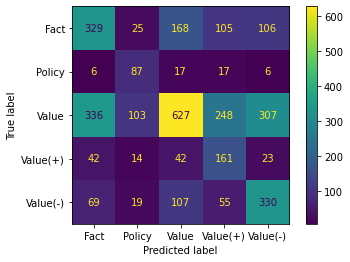

In [48]:
predict(SGDClassifier(random_state=0, n_jobs=-1))